In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


IMPORT the library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

READ the dataset into Dataframe

In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/Data Science Course/AirBnB Data/listings_cleaned.csv")

Have a quick look at the dataset

In [ ]:
df.head(5)

,id,listing_url,name,description,neighborhood_overview,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,35644,https://www.airbnb.com/rooms/35644,Central Hobart Historic Cottage,This renovated 1885 house has fantastic views ...,This part of West Hobart is heritage listed an...,153268,Yvette,27/6/10,"Hobart, Tasmania, Australia",Yvette is a Senior Lecturer at the School of C...,within an hour,100%,100%,t,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"West Hobart, Tasmania, Australia",Hobart,-42.87895,147.31526,Private room in residential home,Private room,2,NaN,1.5 shared baths,1.0,1.0,"[""Dryer"", ""Coffee maker"", ""Hangers"", ""Dedicate...",$50.00,1,7,1,1,7,7,1.0,7.0,t,0,0,0,0,257,0,0,29/1/15,8/3/20,4.82,4.87,4.82,4.96,4.96,4.81,4.90,Exempt: This listing falls under Section 12 of...,f,3,2,1,0,3.12
1,84581,https://www.airbnb.com/rooms/84581,Kentisbury Country House Cradle Coast Tasmania,"Kentisbury Country House is a gorgeous, self c...",The European style house is situated on an acr...,461471,Melissa,24/3/11,"Sheffield, Tasmania, Australia","Life revolves around family, food and operatin...",within an hour,100%,100%,t,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"West Kentish, Tasmania, Australia",Kentish,-41.38856,146.23210,Entire residential home,Entire home/apt,9,NaN,2 baths,3.0,6.0,"[""Hangers"", ""Dedicated workspace"", ""Rice maker...",$295.00,2,90,2,2,90,90,2.0,90.0,t,22,34,47,299,56,21,2,19/2/16,18/2/21,4.98,4.93,5.00,5.00,5.00,4.93,4.93,Exempt: This listing falls under Section 12 of...,t,1,1,0,0,0.81
2,88873,https://www.airbnb.com/rooms/88873,Terrace- 5mins to central Hobart,A two storey 1880s terrace house.<br />Located...,NaN,485048,Russell And Ingrid,5/4/11,"Hobart, Tasmania, Australia",We're Russell and Ingrid.\r\nIngrid is a schoo...,within a few hours,100%,96%,t,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,NaN,Hobart,-42.88267,147.32400,Entire townhouse,Entire home/apt,4,NaN,1 bath,2.0,3.0,"[""Coffee maker"", ""Hangers"", ""Microwave"", ""Heat...",$125.00,2,365,2,2,365,365,2.0,365.0,t,7,13,22,247,467,44,3,8/1/16,10/5/21,4.64,4.75,4.79,4.92,4.84,4.87,4.73,Exempt: This listing falls under Section 12 of...,f,1,1,0,0,6.58
3,137808,https://www.airbnb.com/rooms/137808,Bradman House CBD Launceston Invermay + Free WIFI,Bradman House has polished boards throughout. ...,Bradman House is situated on the edge of Inver...,673625,Emma And Dale,7/6/11,"Launceston, Tasmania, Australia",This is a 2br house with polished floorboards ...,within an hour,100%,98%,f,2.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Invermay, Tasmania, Australia",Launceston,-41.42683,147.12905,Entire residential home,Entire home/apt,9,NaN,1.5 baths,2.0,7.0,"[""Luggage dropoff allowed"", ""Hangers"", ""Dedica...",$195.00,1,180,1,1,180,180,1.0,180.0,t,21,34,53,305,248,39,2,26/1/18,1/12/18,4.43,4.70,4.70,4.76,4.63,4.50,4.54,DA0518/2019,f,2,2,0,0,5.40
4,162081,https://www.airbnb.com/rooms/162081,C

In [ ]:
df.shape

(4782, 63)

There are 4872 listings available in Nov, 2021 in Tasmania
The modified version of the dataset has 63 columns, shorlisted from >100 columns from the original dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4782 entries, 0 to 4781
Data columns (total 63 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            4782 non-null   int64  
 1   listing_url                                   4782 non-null   object 
 2   name                                          4782 non-null   object 
 3   description                                   4781 non-null   object 
 4   neighborhood_overview                         3560 non-null   object 
 5   host_id                                       4782 non-null   int64  
 6   host_name                                     4779 non-null   object 
 7   host_since                                    4779 non-null   object 
 8   host_location                                 4777 non-null   object 
 9   host_about                                    2948 non-null   o

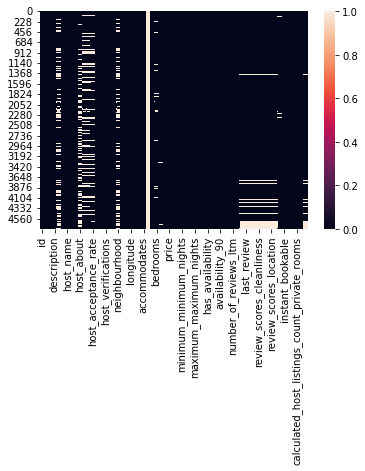

In [ ]:
sns.heatmap(df.isnull());

In [ ]:
df.isnull().sum().sort_values(ascending=False)

bathrooms                                      4782
host_about                                     1834
neighbourhood                                  1222
neighborhood_overview                          1222
host_response_rate                             1053
                                               ... 
minimum_minimum_nights                            0
maximum_nights                                    0
calculated_host_listings_count_shared_rooms       0
price                                             0
id                                                0
Length: 63, dtype: int64

In [ ]:
df = df.drop('bathrooms', 1)

There are quite a few columns that have NULL value in the dataset.

Let's begin cleaning the dataset. First, let frop the columns with ALL null values

In [ ]:
df.isnull().sum().sort_values(ascending=False)

host_about                                     1834
neighbourhood                                  1222
neighborhood_overview                          1222
host_response_rate                             1053
host_response_time                             1053
                                               ... 
minimum_minimum_nights                            0
maximum_nights                                    0
calculated_host_listings_count_shared_rooms       0
price                                             0
id                                                0
Length: 62, dtype: int64

To answer the 1st group of questions, let's only selected the related columns

In [ ]:
# Only selected the columns needed for analysis]
df_q1 = df[["id","name", "neighborhood_overview","host_id","host_name","host_since", "host_location","host_about","host_is_superhost","host_listings_count", "neighbourhood", "neighbourhood_cleansed", "property_type","room_type","accommodates","number_of_reviews","review_scores_rating","license"]]

In [ ]:
df_q1.isnull().sum().sort_values(ascending=False)

host_about                1834
neighborhood_overview     1222
neighbourhood             1222
review_scores_rating       307
license                     73
host_location                5
host_name                    3
host_since                   3
host_is_superhost            3
host_listings_count          3
neighbourhood_cleansed       0
property_type                0
room_type                    0
accommodates                 0
host_id                      0
number_of_reviews            0
name                         0
id                           0
dtype: int64

In [ ]:
df_q1[df_q1.host_listings_count.isnull()]

,id,name,neighborhood_overview,host_id,host_name,host_since,host_location,host_about,host_is_superhost,host_listings_count,neighbourhood,neighbourhood_cleansed,property_type,room_type,accommodates,number_of_reviews,review_scores_rating,license
2639,30256928,Cosy 1920s Cottage ~ 6 min to Hobart CBD,Lutana is a quiet residential suburb just 6 mi...,959326,NaN,NaN,NaN,NaN,NaN,NaN,"Lutana, Tasmania, Australia",Glenorchy,Entire residential home,Entire home/apt,6,12,5.00,PLN-18-243
3164,37016586,Ann Bay Cabins,There is a store 5 minutes drive for all your ...,278306424,NaN,NaN,NaN,NaN,NaN,NaN,"Marrawah, Tasmania, Australia",Circular Head,Entire guesthouse,Entire home/apt,2,47,4.87,"Exempt: This listing is a hotel, motel, or car..."
3813,43391855,Harbour Lookout,The house sit on the button grass plains and i...,98145542,NaN,NaN,NaN,NaN,NaN,NaN,"Strahan, Tasmania, Australia",West Coast,Entire residential home,Entire home/apt,8,42,5.00,DA 2020


There are 3 rows with Null Values in multiples columns ==> We can simply remove those rows, as it won't significantly affect the completeness of the dataset

In [ ]:
df_q1=df_q1.dropna(subset=['host_name'])

In [ ]:
df_q1.isnull().sum().sort_values(ascending=False)

host_about                1831
neighborhood_overview     1222
neighbourhood             1222
review_scores_rating       307
license                     73
host_location                2
name                         0
host_id                      0
host_name                    0
host_since                   0
host_is_superhost            0
host_listings_count          0
neighbourhood_cleansed       0
property_type                0
room_type                    0
accommodates                 0
number_of_reviews            0
id                           0
dtype: int64

In [ ]:
df_q1[df_q1.license.isnull()]

,id,name,neighborhood_overview,host_id,host_name,host_since,host_location,host_about,host_is_superhost,host_listings_count,neighbourhood,neighbourhood_cleansed,property_type,room_type,accommodates,number_of_reviews,review_scores_rating,license
29,757987,The Granary,NaN,3969263,Patricia,24/10/12,"Hobart, Tasmania, Australia",Hi I am from the U K but lived in Aust for 40...,f,4.0,NaN,Derwent Valley,Entire cottage,Entire home/apt,3,5,3.33,NaN
95,1967543,Grindelwald Dinner & Breakfast Promotion,"We have a unique, Swiss Village atmosphere, wi...",4547789,Helen,1/1/13,"Grindelwald, Tasmania, Australia",My husband Michael and I love living in Tasman...,t,11.0,"Grindelwald, Tasmania, Australia",West Tamar,Private room in guest suite,Private room,2,37,4.86,NaN
126,2291180,Tamar Ridge Superior Apt No.7,"Located on a vineyard, 10 Chalets are all 50 ...",4547789,Helen,1/1/13,"Grindelwald, Tasmania, Australia",My husband Michael and I love living in Tasman...,t,11.0,"Grindelwald, Tasmania, Australia",West Tamar,Entire serviced apartment,Entire home/apt,2,102,4.80,NaN
143,2438716,Traditional Bed and Breakfast,NaN,9592223,Annie,23/10/13,"Weegena, Tasmania, Australia",We have recently retired and love living here ...,f,1.0,NaN,Meander Valley,Private room in bed and breakfast,Private room,2,3,5.00,NaN
203,3783861,Mermaids of Bicheno - sparkling clean & spacious,"Mermaids of Bicheno is ideally located, just a...",19418558,Jacqueline,4/8/14,"Tasmania, Australia",I'm Jakki. I love to share my local knowledge ...,t,4.0,"Bicheno, Tasmania, Australia",Glamorgan/Spring Bay,Entire residential home,Entire home/apt,4,71,4.80,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3256,38135505,Best Western Burnie Murchison Lodge- Twin (Min...,NaN,285512792,Cindi,13/8/19,"Burnie, Tasmania, Australia","Hi, my name is Cindi. Kevin and I are the pro...",t,0.0,NaN,Waratah/Wynyard,Room in hotel,Hotel room,3,0,NaN,NaN
3257,38135625,Best Western Murchison Lodge -Twin Room (Min 30N),NaN,285512792,Cindi,13/8/19,"Burnie, Tasmania, Australia","Hi, my name is Cindi. Kevin and I are the pro...",t,0.0,NaN,Waratah/Wynyard,Room in hotel,Hotel room,3,0,NaN,NaN
3259,38138778,Best Western Murchison Lodge - Queen Room (Min...,NaN,285512792,Cindi,13/8/19,"Burnie, Tasmania, Australia","Hi, my name is Cindi. Kevin and I are the pro...",t,0.0,NaN,Waratah/Wynyard,Room in hotel,Hotel room,2,0,NaN,NaN
3261,38139442,Best Western Murchison Lodge - Queen Room,NaN,285512792,Cindi,13/8/19,"Burnie, Tasmania, Australia","Hi, my name is Cindi. Kevin and I are the pro...",t,0.0,NaN,Waratah/Wynyard,Room in hotel,Hotel room,2,10,4.90,NaN


In [ ]:
df_q1.license.describe()

count                                                  4706
unique                                                 1536
top       Exempt: This listing falls under the 'home sha...
freq                                                   1474
Name: license, dtype: object

This column is complicated. Needs more time to read law documents

In [ ]:
df_q1[df_q1.review_scores_rating.isnull()]

,id,name,neighborhood_overview,host_id,host_name,host_since,host_location,host_about,host_is_superhost,host_listings_count,neighbourhood,neighbourhood_cleansed,property_type,room_type,accommodates,number_of_reviews,review_scores_rating,license
110,2131566,Ivy on Glenelg,NaN,10875379,David,28/12/13,"Campbell Town, Tasmania, Australia",Semi retired. Irene and I have been in the Hos...,f,0.0,NaN,Northern Midlands,Entire bed and breakfast,Entire home/apt,2,0,NaN,P05-349
140,2426886,Killymoon Suite,NaN,9775636,Colin,2/11/13,AU,We built Hatchers Manor over the past 23 years...,f,14.0,NaN,Clarence,Private room in rental unit,Private room,3,0,NaN,FP-362
362,5631421,Blue Door cottage on Balfour St,NaN,29185803,Brett,11/3/15,"Lismore, New South Wales, Australia",NaN,f,0.0,NaN,Launceston,Entire residential home,Entire home/apt,4,0,NaN,DA038612021
496,8424809,River View Apartment,Overlooking picturesque Mersey River and Victo...,44369101,Rex & Julianne,16/9/15,"Devonport, Tasmania, Australia","We are a married couple, mature age, like meet...",f,0.0,"Devonport, Tasmania, Australia",Devonport,Private room in rental unit,Private room,2,0,NaN,PA2004.0002
589,9652592,Balmoral House at Bay of Fires,"Wonderful, friendly, quiet seaside village fee...",13206820,Jane,17/3/14,"Orange, New South Wales, Australia",After living in Tasmania for several years we ...,f,3.0,"Binalong Bay, Tasmania, Australia",Break O'Day,Entire villa,Entire home/apt,6,0,NaN,Exempt: This listing falls under Section 12 of...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4777,53083169,The Papermakers Cottage,NaN,17573451,Jessica,2/7/14,"Jacksonville, Florida, United States",We are local Tasmanians hosting along the nort...,t,1.0,NaN,Burnie,Entire residential home,Entire home/apt,4,0,NaN,Exempt: This listing falls under the 'home sha...
4778,53083980,Sprawling West Hobart Property with Stunning V...,NaN,429730727,Julie,31/10/21,AU,NaN,f,0.0,NaN,Hobart,Entire residential home,Entire home/apt,8,0,NaN,PLN-21-712
4779,53112673,Bicheno Gardens,NaN,16836695,Stephen & Lindsay,15/6/14,"Coles Bay, Tasmania, Australia",Steve Eyles\r\nSteve’s early grounding was in ...,f,36.0,NaN,Glamorgan/Spring Bay,Entire residential home,Entire home/apt,4,0,NaN,DA 2021/304
4780,53117645,Affordable cozy room in the heart of town,NaN,214368919,Luisa Fernanda,9/9/18,"Bicheno, Tasmania, Australia",NaN,f,0.0,NaN,Glamorgan/Spring Bay,Private room in villa,Private room,2,0,NaN,Exempt: This listing falls under the 'home sha...


LET'S CLEAN THE NEXT COLUMN: Reviews Score Rating

In [ ]:
df[df.review_scores_rating.isnull()]

,id,listing_url,name,description,neighborhood_overview,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
110,2131566,https://www.airbnb.com/rooms/2131566,Ivy on Glenelg,Dry Cottage is self-contained with a fully equ...,NaN,10875379,David,28/12/13,"Campbell Town, Tasmania, Australia",Semi retired. Irene and I have been in the Hos...,within a day,100%,100%,f,0.0,"['email', 'phone', 'jumio', 'offline_governmen...",t,t,NaN,Northern Midlands,-41.92302,147.48978,Entire bed and breakfast,Entire home/apt,2,1 bath,1.0,NaN,"[""Breakfast"", ""Wifi"", ""Free parking on premise...",$160.00,1,1125,1,1,30,30,1.0,30.0,t,11,23,23,275,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P05-349,t,1,1,0,0,NaN
140,2426886,https://www.airbnb.com/rooms/2426886,Killymoon Suite,My place is good for couples and families (wit...,NaN,9775636,Colin,2/11/13,AU,We built Hatchers Manor over the past 23 years...,within an hour,100%,97%,f,14.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,NaN,Clarence,-42.72835,147.44420,Private room in rental unit,Private room,3,1 bath,1.0,2.0,"[""Iron"", ""Wifi"", ""Hair dryer"", ""Lock on bedroo...",$169.00,1,1125,1,1,1125,1125,1.0,1125.0,t,0,0,0,72,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FP-362,t,14,1,13,0,NaN
362,5631421,https://www.airbnb.com/rooms/5631421,Blue Door cottage on Balfour St,On the fringe of the CBD located within easy ...,NaN,29185803,Brett,11/3/15,"Lismore, New South Wales, Australia",NaN,within an hour,100%,100%,f,0.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,NaN,Launceston,-41.44706,147.13433,Entire residential home,Entire home/apt,4,1 bath,2.0,2.0,"[""Cooking basics"", ""Iron"", ""Dryer"", ""Lockbox"",...",$240.00,2,1125,2,2,1125,1125,2.0,1125.0,t,0,0,1,59,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DA038612021,t,1,1,0,0,NaN
496,8424809,https://www.airbnb.com/rooms/8424809,River View Apartment,"Self-Contained and Self-Catering, one queen si...",Overlooking picturesque Mersey River and Victo...,44369101,Rex & Julianne,16/9/15,"Devonport, Tasmania, Australia","We are a married couple, mature age, like meet...",within an hour,100%,100%,f,0.0,"['email', 'phone', 'jumio', 'offline_governmen...",t,t,"Devonport, Tasmania, Australia",Devonport,-41.16990,146.36331,Private room in rental unit,Private room,2,1 private bath,1.0,1.0,"[""Iron"", ""Dryer"", ""Washer"", ""Host greets you"",...",$189.00,2,1125,1,2,1125,1125,1.9,1125.0,t,26,50,79,350,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PA2004.0002,t,2,0,2,0,NaN
589,9652592,https://www.airbnb.com/rooms/9652592,Balmoral House at Bay of Fires,"Superb accommodation, offering arguably the be...","Wonderful, friendly, quiet seaside village fee...",13206820,Jane,17/3/14,"Orange, New South Wales, Australia",After living in Tasmania for several years we ...,NaN,NaN,NaN,f,3.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Binalong Bay, Tasmania, Australia",Break O'Day,-41.25195,148.30652,Entire villa,Entire home/apt,6,2.5 baths,3.0,4.0,"[""Dryer"", ""Hangers"",

In [ ]:
df[df.review_scores_rating.notnull()]

,id,listing_url,name,description,neighborhood_overview,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,35644,https://www.airbnb.com/rooms/35644,Central Hobart Historic Cottage,This renovated 1885 house has fantastic views ...,This part of West Hobart is heritage listed an...,153268,Yvette,27/6/10,"Hobart, Tasmania, Australia",Yvette is a Senior Lecturer at the School of C...,within an hour,100%,100%,t,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"West Hobart, Tasmania, Australia",Hobart,-42.87895,147.31526,Private room in residential home,Private room,2,1.5 shared baths,1.0,1.0,"[""Dryer"", ""Coffee maker"", ""Hangers"", ""Dedicate...",$50.00,1,7,1,1,7,7,1.0,7.0,t,0,0,0,0,257,0,0,29/1/15,8/3/20,4.82,4.87,4.82,4.96,4.96,4.81,4.90,Exempt: This listing falls under Section 12 of...,f,3,2,1,0,3.12
1,84581,https://www.airbnb.com/rooms/84581,Kentisbury Country House Cradle Coast Tasmania,"Kentisbury Country House is a gorgeous, self c...",The European style house is situated on an acr...,461471,Melissa,24/3/11,"Sheffield, Tasmania, Australia","Life revolves around family, food and operatin...",within an hour,100%,100%,t,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"West Kentish, Tasmania, Australia",Kentish,-41.38856,146.23210,Entire residential home,Entire home/apt,9,2 baths,3.0,6.0,"[""Hangers"", ""Dedicated workspace"", ""Rice maker...",$295.00,2,90,2,2,90,90,2.0,90.0,t,22,34,47,299,56,21,2,19/2/16,18/2/21,4.98,4.93,5.00,5.00,5.00,4.93,4.93,Exempt: This listing falls under Section 12 of...,t,1,1,0,0,0.81
2,88873,https://www.airbnb.com/rooms/88873,Terrace- 5mins to central Hobart,A two storey 1880s terrace house.<br />Located...,NaN,485048,Russell And Ingrid,5/4/11,"Hobart, Tasmania, Australia",We're Russell and Ingrid.\r\nIngrid is a schoo...,within a few hours,100%,96%,t,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,NaN,Hobart,-42.88267,147.32400,Entire townhouse,Entire home/apt,4,1 bath,2.0,3.0,"[""Coffee maker"", ""Hangers"", ""Microwave"", ""Heat...",$125.00,2,365,2,2,365,365,2.0,365.0,t,7,13,22,247,467,44,3,8/1/16,10/5/21,4.64,4.75,4.79,4.92,4.84,4.87,4.73,Exempt: This listing falls under Section 12 of...,f,1,1,0,0,6.58
3,137808,https://www.airbnb.com/rooms/137808,Bradman House CBD Launceston Invermay + Free WIFI,Bradman House has polished boards throughout. ...,Bradman House is situated on the edge of Inver...,673625,Emma And Dale,7/6/11,"Launceston, Tasmania, Australia",This is a 2br house with polished floorboards ...,within an hour,100%,98%,f,2.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Invermay, Tasmania, Australia",Launceston,-41.42683,147.12905,Entire residential home,Entire home/apt,9,1.5 baths,2.0,7.0,"[""Luggage dropoff allowed"", ""Hangers"", ""Dedica...",$195.00,1,180,1,1,180,180,1.0,180.0,t,21,34,53,305,248,39,2,26/1/18,1/12/18,4.43,4.70,4.70,4.76,4.63,4.50,4.54,DA0518/2019,f,2,2,0,0,5.40
4,162081,https://www.airbnb.com/rooms/162081,Crickhollow Home Stay,Ideal

After checking some listings with NULL values and NOT NULL values, it can be confirmed that the N/A means these properties have not been reviewed and rated.

Therefore, these columns can be dropped later when we analyze the impacts of ratings

In [ ]:
df_q1[df_q1.neighbourhood.isnull()]

,id,name,neighborhood_overview,host_id,host_name,host_since,host_location,host_about,host_is_superhost,host_listings_count,neighbourhood,neighbourhood_cleansed,property_type,room_type,accommodates,number_of_reviews,review_scores_rating,license
2,88873,Terrace- 5mins to central Hobart,NaN,485048,Russell And Ingrid,5/4/11,"Hobart, Tasmania, Australia",We're Russell and Ingrid.\r\nIngrid is a schoo...,t,1.0,NaN,Hobart,Entire townhouse,Entire home/apt,4,467,4.64,Exempt: This listing falls under Section 12 of...
15,499959,ARTHOUSE Bay of Fires INSPIRING BEACH HOUSE,NaN,164588610,Jan,28/12/17,"Binalong Bay, Tasmania, Australia",Moved to Binalong Bay Tasmania from mainland A...,t,24.0,NaN,Break O'Day,Entire residential home,Entire home/apt,4,55,4.91,Exempt: This listing falls under Section 12 of...
19,534199,LittlePineShack,NaN,2625657,Nicholas,13/6/12,"Melbourne, Victoria, Australia",Accredited tourist operator and Lawyer,f,1.0,NaN,Central Highlands,Entire residential home,Entire home/apt,6,23,4.83,Exempt: This listing falls under Section 12 of...
24,689381,"House by the Beach, Beautiful View- 20 m from ...",NaN,3521501,Gaye,10/9/12,"Blackmans Bay, Tasmania, Australia","Hi, my name ıs Gaye,\r\nı love to meet people ...",t,2.0,NaN,Kingborough,Entire residential home,Entire home/apt,4,29,4.69,Exempt: This listing falls under the 'home sha...
25,708702,Battery Point walk to all + Mt view + level ac...,NaN,3645455,Tracey,22/9/12,"Hobart, Tasmania, Australia",A Hobart native who enjoys helping visitors di...,t,3.0,NaN,Hobart,Entire rental unit,Entire home/apt,2,184,4.79,Exempt: This listing falls under the 'home sha...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4777,53083169,The Papermakers Cottage,NaN,17573451,Jessica,2/7/14,"Jacksonville, Florida, United States",We are local Tasmanians hosting along the nort...,t,1.0,NaN,Burnie,Entire residential home,Entire home/apt,4,0,NaN,Exempt: This listing falls under the 'home sha...
4778,53083980,Sprawling West Hobart Property with Stunning V...,NaN,429730727,Julie,31/10/21,AU,NaN,f,0.0,NaN,Hobart,Entire residential home,Entire home/apt,8,0,NaN,PLN-21-712
4779,53112673,Bicheno Gardens,NaN,16836695,Stephen & Lindsay,15/6/14,"Coles Bay, Tasmania, Australia",Steve Eyles\r\nSteve’s early grounding was in ...,f,36.0,NaN,Glamorgan/Spring Bay,Entire residential home,Entire home/apt,4,0,NaN,DA 2021/304
4780,53117645,Affordable cozy room in the heart of town,NaN,214368919,Luisa Fernanda,9/9/18,"Bicheno, Tasmania, Australia",NaN,f,0.0,NaN,Glamorgan/Spring Bay,Private room in villa,Private room,2,0,NaN,Exempt: This listing falls under the 'home sha...


The number of NULL values is siginifcantly high and it is hard to fill in.

Therefore, we can simply just used data in the column: cleansed neighborhood for analysis and drop this column for now.

If further analysis of exact location is needed, we can identify them later by using the longitude & latitude variables

In [ ]:
df_q1.drop("neighbourhood",1)

,id,name,neighborhood_overview,host_id,host_name,host_since,host_location,host_about,host_is_superhost,host_listings_count,neighbourhood_cleansed,property_type,room_type,accommodates,number_of_reviews,review_scores_rating,license
0,35644,Central Hobart Historic Cottage,This part of West Hobart is heritage listed an...,153268,Yvette,27/6/10,"Hobart, Tasmania, Australia",Yvette is a Senior Lecturer at the School of C...,t,3.0,Hobart,Private room in residential home,Private room,2,257,4.82,Exempt: This listing falls under Section 12 of...
1,84581,Kentisbury Country House Cradle Coast Tasmania,The European style house is situated on an acr...,461471,Melissa,24/3/11,"Sheffield, Tasmania, Australia","Life revolves around family, food and operatin...",t,1.0,Kentish,Entire residential home,Entire home/apt,9,56,4.98,Exempt: This listing falls under Section 12 of...
2,88873,Terrace- 5mins to central Hobart,NaN,485048,Russell And Ingrid,5/4/11,"Hobart, Tasmania, Australia",We're Russell and Ingrid.\r\nIngrid is a schoo...,t,1.0,Hobart,Entire townhouse,Entire home/apt,4,467,4.64,Exempt: This listing falls under Section 12 of...
3,137808,Bradman House CBD Launceston Invermay + Free WIFI,Bradman House is situated on the edge of Inver...,673625,Emma And Dale,7/6/11,"Launceston, Tasmania, Australia",This is a 2br house with polished floorboards ...,f,2.0,Launceston,Entire residential home,Entire home/apt,9,248,4.43,DA0518/2019
4,162081,Crickhollow Home Stay,We love Bruny Island for the diversity of natu...,775015,Patricia,4/7/11,Bruny Island Tasmania Australia,My partner John and I live on Beautiful Bruny ...,f,1.0,Kingborough,Private room in guest suite,Private room,2,441,4.86,Exempt: This listing falls under the 'home sha...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4777,53083169,The Papermakers Cottage,NaN,17573451,Jessica,2/7/14,"Jacksonville, Florida, United States",We are local Tasmanians hosting along the nort...,t,1.0,Burnie,Entire residential home,Entire home/apt,4,0,NaN,Exempt: This listing falls under the 'home sha...
4778,53083980,Sprawling West Hobart Property with Stunning V...,NaN,429730727,Julie,31/10/21,AU,NaN,f,0.0,Hobart,Entire residential home,Entire home/apt,8,0,NaN,PLN-21-712
4779,53112673,Bicheno Gardens,NaN,16836695,Stephen & Lindsay,15/6/14,"Coles Bay, Tasmania, Australia",Steve Eyles\r\nSteve’s early grounding was in ...,f,36.0,Glamorgan/Spring Bay,Entire residential home,Entire home/apt,4,0,NaN,DA 2021/304
4780,53117645,Affordable cozy room in the heart of town,NaN,214368919,Luisa Fernanda,9/9/18,"Bicheno, Tasmania, Australia",NaN,f,0.0,Glamorgan/Spring Bay,Private room in villa,Private room,2,0,NaN,Exempt: This listing falls under the 'home sha...


As nearly haft of the host_about column is missing.
We can later categorize this column into: No description, Short description & Long description for better analysis

## **START THE ANALYSIS:  OVER ALL INDUSTRY INFORMATION**

Transform the host_since data into Year

In [ ]:
def extract_year(row):
  year = row[-2:]
  return int("20"+year)

In [ ]:
print(extract_year("15/6/14"))

2014


In [ ]:
df_q1["host_since"]=df_q1["host_since"].astype(str)

In [ ]:
df_q1["year"] = df_q1["host_since"].apply(extract_year)

As one host can have multiple properties, to analyze the number of new hosts in each year, we will drop the duplicated values in host_id columns

In [ ]:
df_host = df_q1.drop_duplicates(subset = ["host_id"])

In [ ]:
host_year = df_host.groupby("year")['host_id'].count().cumsum().reset_index()
host_year

,year,host_id
0,2009,2
1,2010,8
2,2011,48
3,2012,159
4,2013,351
5,2014,725
6,2015,1226
7,2016,1771
8,2017,2196
9,2018,2518


Text(0.5, 1.0, 'Number of Tasmanian AirBnB hosts from 2009-2021')

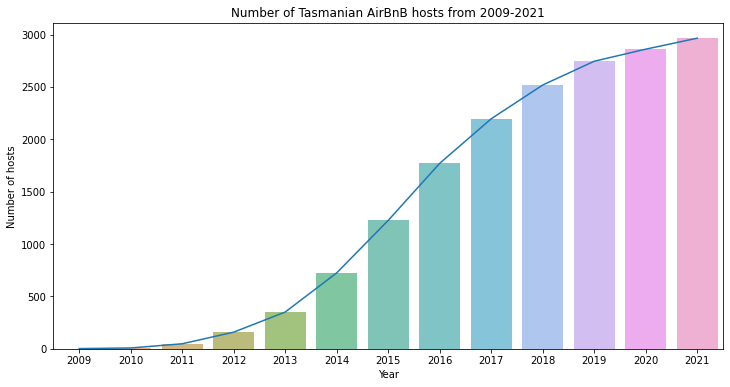

In [ ]:
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(12,6))

sns.lineplot(data = host_year["host_id"], ax=ax1)

# ax2 = ax1.twinx()

sns.barplot(data = host_year, x = "year", y ="host_id", alpha=0.7, ax=ax1)

plt.xlabel("Year") 
plt.ylabel("Number of hosts")
plt.title("Number of Tasmanian AirBnB hosts from 2009-2021")

In [ ]:
df_q1.groupby("host_location")['host_id'].count().reset_index()


,host_location,host_id
0,AU,524
1,"Aberdeen City, Scotland, United Kingdom",1
2,"Abu Dhabi, Abu Dhabi, United Arab Emirates",1
3,"Acacia Hills, Northern Territory, Australia",2
4,"Acacia Hills, Tasmania, Australia",1
...,...,...
575,"Youngtown, Tasmania, Australia",4
576,Your current city,1
577,"Zeehan, Tasmania, Australia",2
578,tasmania,1


(****) This is not good for analysis ==> SKIP FOR NOW

In [ ]:
top_10_region = df_host.groupby("neighbourhood_cleansed")['id'].count().reset_index().sort_values("id", ascending=False).head(10)
top_10_region

,neighbourhood_cleansed,id
14,Hobart,657
20,Launceston,228
18,Kingborough,227
6,Clarence,206
12,Glamorgan/Spring Bay,203
0,Break O'Day,158
15,Huon Valley,122
28,West Tamar,98
25,Tasman,94
3,Central Coast,90


In [ ]:
region = top_10_region["neighbourhood_cleansed"].tolist()

Text(0.5, 1.0, 'Top 10 surburbs with the most listings in Nov/2021')

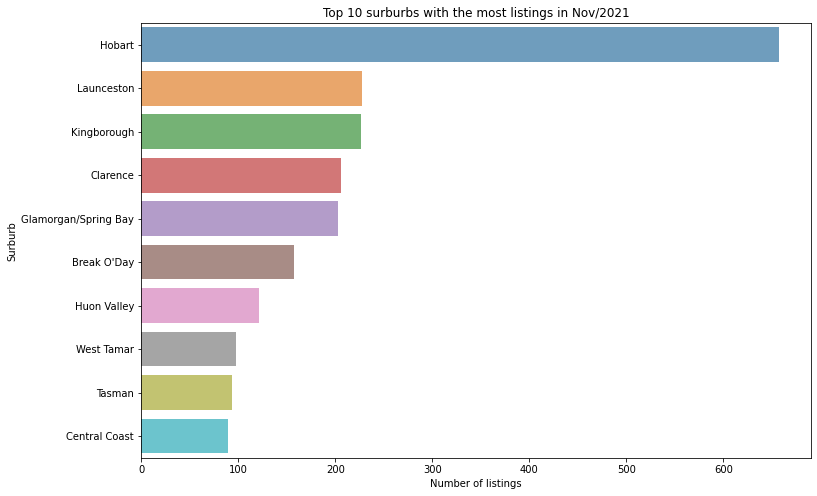

In [ ]:
ax1 = sns.set_style(style=None, rc=None)
fig, ax1 = plt.subplots(figsize=(12,8))
sns.barplot(data = top_10_region, x = "id", y ="neighbourhood_cleansed", alpha = 0.7)
plt.xlabel("Number of listings") 
plt.ylabel("Surburb")
plt.title("Top 10 surburbs with the most listings in Nov/2021")

HISTOGRAM OF PRICE

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


Text(0.5, 0, 'Surburb')

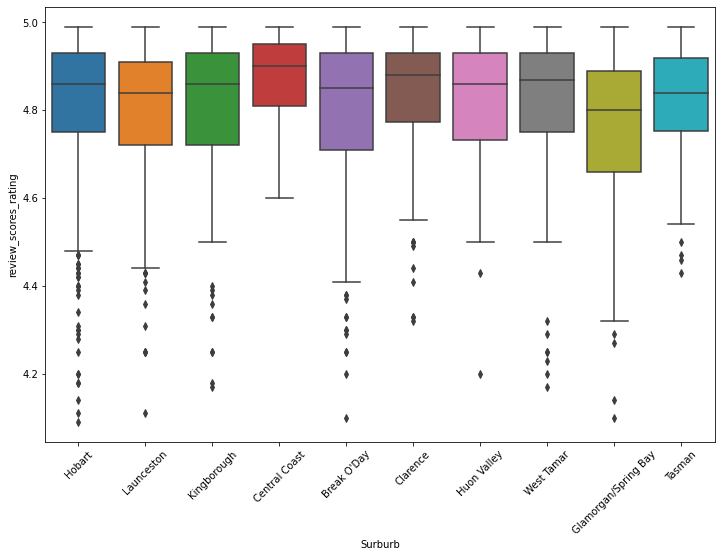

In [ ]:
rating = df_q1.dropna(subset= ["review_scores_rating"],axis = 0)
q_low = rating["review_scores_rating"].quantile(0.01)
q_hi  = rating["review_scores_rating"].quantile(0.99)
rating_filtered = rating[(rating["review_scores_rating"] < q_hi) & (rating["review_scores_rating"] > q_low)][rating["neighbourhood_cleansed"].isin(region)]
ax1 = sns.set_style(style=None, rc=None)
fig, ax1 = plt.subplots(figsize=(12,8))
sns.boxplot(data= rating_filtered, x="neighbourhood_cleansed", y= "review_scores_rating", ax=ax1)
plt.xticks(rotation=45)
plt.xlabel("Surburb")


Text(0.5, 0, 'Surburb')

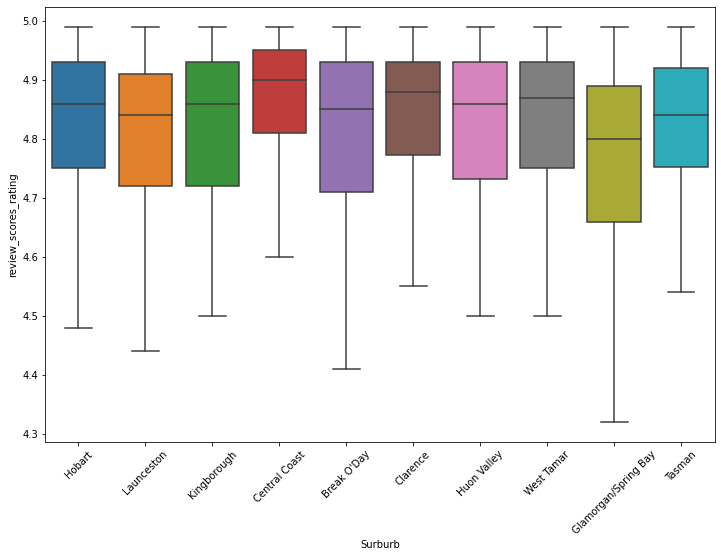

In [ ]:
ax1 = sns.set_style(style=None, rc=None)
fig, ax1 = plt.subplots(figsize=(12,8))
sns.boxplot(data= rating_filtered, x="neighbourhood_cleansed", y= "review_scores_rating", ax=ax1, sym= "")
plt.xticks(rotation=45)
plt.xlabel("Surburb")


In [ ]:
sns.catplot(data=top_10_region, x= "id", y = "")

In [ ]:
def price_extract(value):
  value = value.split("$")[1]
  value = value.replace(",","")
  return float(value)

In [ ]:
price_list = df['price'].apply(price_extract)

([<matplotlib.axis.XTick at 0x7f85e1ef3e90>,
 <a list of 12 Text major ticklabel objects>)

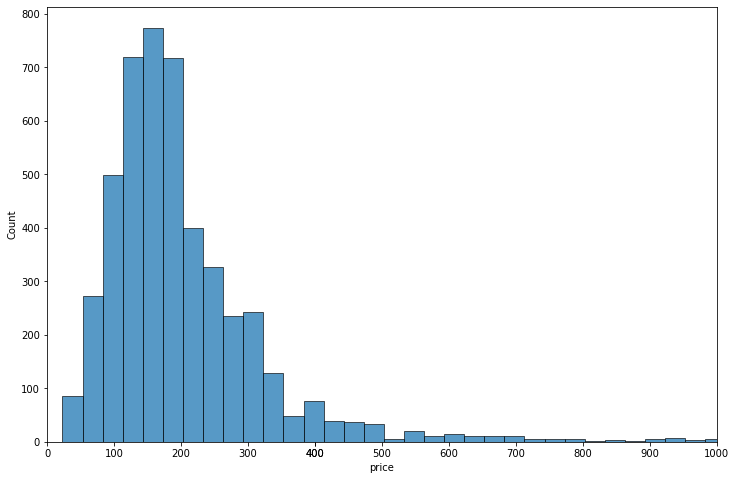

In [ ]:
ax = sns.set_style(style=None, rc=None)
fig, ax = plt.subplots(figsize=(12,8))
sns.histplot(price_list, binwidth=30)
plt.xlim(0, 1000)
plt.xticks(list(plt.xticks()[0]) + [100,300,400,500,700,900])

Hypothesis 3: There are hosts who are running a business with multiple listings across the state

In [ ]:
top_hosts = df_q1.sort_values("host_listings_count",ascending=False).drop_duplicates(subset = ["host_id"]).head(10)
top_hosts

,id,name,neighborhood_overview,host_id,host_name,host_since,host_location,host_about,host_is_superhost,host_listings_count,neighbourhood,neighbourhood_cleansed,property_type,room_type,accommodates,number_of_reviews,review_scores_rating,license,year
3276,38266153,EMBRACING EVANDALE-Launceston -Tasmania🏖.,Launceston city - 15 min drive <br />Airport -...,7409213,L'Abode Accommodation Specialist,10/7/13,"Greens Beach, Tasmania, Australia",L'Abode Accommodation specialises in short and...,f,135.0,"Evandale, Tasmania, Australia",Northern Midlands,Entire residential home,Entire home/apt,5,53,4.91,P/N: 202700.125,2013
1860,22442536,Driftwood,"Set in a waterfront location, this is a quite ...",25626715,Verina,5/1/15,"Cornwall, Tasmania, Australia",The Freycinet Holiday Houses team do everythin...,f,87.0,"Coles Bay, Tasmania, Australia",Glamorgan/Spring Bay,Entire residential home,Entire home/apt,4,66,4.94,DA16166,2015
3894,44435132,Cooma House - FLEX COVID CANCEL POLICY,There are many activities to do around the pro...,85705998,Ready Set Stay,24/7/16,"Melbourne, Victoria, Australia",Welcome to Ready Set Stay. \r\n\r\nOwn a furni...,f,77.0,"Lady Barron, Tasmania, Australia",Flinders,Entire residential home,Entire home/apt,15,0,NaN,Exempt: This listing falls under the 'home sha...,2016
4711,52573018,Quirindi,"We are located in Dunalley, a quiet fishing vi...",154813436,Tiny Away,16/10/17,SG,Tiny Away spearheads the tiny house eco-touris...,t,73.0,"Dunalley, Tasmania, Australia",Sorell,Entire residential home,Entire home/apt,2,0,NaN,Exempt: This listing falls under the 'home sha...,2017
3166,37064181,Peter Mills Apartment No 2,NaN,92557519,Donna,30/8/16,"Blackstone Heights, Tasmania, Australia",Welcome to TAG! \n\nA boutique property manage...,f,44.0,NaN,Launceston,Entire rental unit,Entire home/apt,6,20,4.95,DA0040/2017,2016
2283,26134380,Allure - Bicheno,NaN,16836695,Stephen & Lindsay,15/6/14,"Coles Bay, Tasmania, Australia",Steve Eyles\r\nSteve’s early grounding was in ...,f,36.0,NaN,Glamorgan/Spring Bay,Entire residential home,Entire home/apt,6,37,4.72,DA 2017/00265,2014
4071,46604149,Funky In The Centre Of Town With WIFI & Parking,George St is Launceston's 'eat street' with cu...,5266238,Moxxi,28/2/13,"Launceston, Tasmania, Australia",At Moxxi Property we have the honour of assist...,t,27.0,"Launceston, Tasmania, Australia",Launceston,Entire residential home,Entire home/apt,5,23,4.77,Exempt: This listing falls under Section 12 of...,2013
1144,16561330,The Ultimate Beach House - Bicheno,NaN,70084453,LJ Hooker,3/5/16,"Bicheno, Tasmania, Australia","L.J.Hooker, Bicheno have been managing holiday...",f,25.0,NaN,Glamorgan/Spring Bay,Entire residential home,Entire home/apt,8,52,4.65,Exempt: This listing falls under the 'home sha...,2016
909,14679272,Hobart on Argyle - walk to restaurant strip,NaN,25511005,Natalie:,2/1/15,"Hobart, Tasmania, Australia","I love this city and all it has to offer, and ...",t,25.0,NaN,Hobart,Entire residential home,Entire home/apt,7,117,4.75,PLN-16-278,2015
1382,18437601,BAY OF FIRES VISTA Boutique Accommodation,The Bay of Fires is absolutely beautiful. Enjo...,164588610,Jan,28/12/17,"Binalong Bay, Tasmania, Australia",Moved to Binalong Bay Tasmania from mainland A...,t,24.0,"Binalong Bay, Tasmania, Australia",Break O'Day,Entire residential home,Entire home/apt,8,41,4.95,Exempt: This listing falls under Section 12 of...,2017
